In [1]:
import cenpy
import contextily as ctx 
import segregation
%matplotlib inline
import matplotlib as mpl

In [2]:
import xyzservices.providers as xyz
import matplotlib.pyplot as plt #to make sure there are no errors when plotting a graph
from contextily import add_basemap
import folium 

In [3]:
import geopandas as gpd 
from census import Census 
from us import states
from shapely.geometry import Polygon

In [20]:
import pandas as pd
import openpyxl

CPS Historical Migration/Geographic Mobility Tables

In [103]:
Texas =pd.read_excel('../county-to-county-2015-2019-ins-outs-nets-gross.xlsx', sheet_name='Texas')

In [104]:
Texas_df = pd.DataFrame(Texas)

In [105]:
Texas_df.head(1)

,State Code of Geography A,FIPS County Code of Geography A,State/U.S. Island Area/Foreign Region Code of Geography B,FIPS County Code of Geography B',State Name of Geography A,County Name of Geography A,State/U.S. Island Area/Foreign Region of Geography B,County Name of Geography B,Flow from Geography B to Geography A Estimate,Flow from Geography B to Geography A MOE,Counterflow from Geography A to Geography B1 Estimate,Counterflow from Geography A to Geography B1 MOE,Net Migration from Geography B to Geography A1 MOE,Net Migration from Geography B to Geography A1 Estimate,Gross Migration between Geography A and Geography B1 Estimate',Gross Migration between Geography A and Geography B1 MOE
0,048,1.0,001,89.0,Texas,Anderson County,Alabama,Madison County,13.0,19.0,0.0,28.0,13.0,19.0,13.0,19.0


In [106]:
Texas_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31929 entries, 0 to 31928
Data columns (total 16 columns):
 #   Column                                                          Non-Null Count  Dtype  
---  ------                                                          --------------  -----  
 0   State Code of Geography A                                       31929 non-null  object 
 1   FIPS County Code of Geography A                                 31923 non-null  float64
 2   State/U.S. Island Area/Foreign Region Code of Geography B       31923 non-null  object 
 3   FIPS County Code of Geography B'                                31256 non-null  float64
 4   State Name of Geography A                                       31923 non-null  object 
 5   County Name of Geography A                                      31923 non-null  object 
 6   State/U.S. Island Area/Foreign Region of Geography B            31923 non-null  object 
 7   County Name of Geography B                       

Flow out of Bexar County

In [130]:
bexar_county_out = pd.read_excel('../FlowOutBexar.xlsx')
bexar_county_out.head()

,State Code of Geography A,FIPS County Code of Geography A,State/U.S. Island Area/Foreign Region Code of Geography B,FIPS County Code of Geography B',State Name of Geography A,County Name of Geography A,State/U.S. Island Area/Foreign Region of Geography B,County Name of Geography B,Flow from Geography B to Geography A Estimate,Flow from Geography B to Geography A MOE,Counterflow from Geography A to Geography B1 Estimate,Counterflow from Geography A to Geography B1 MOE,Net Migration from Geography B to Geography A1 MOE,Net Migration from Geography B to Geography A1 Estimate,Gross Migration between Geography A and Geography B1 Estimate',Gross Migration between Geography A and Geography B1 MOE
0,48,29,001,3.0,Texas,Bexar County,Alabama,Baldwin County,11,19,16.0,27.0,-5.0,34.0,27.0,32.0
1,48,29,001,15.0,Texas,Bexar County,Alabama,Calhoun County,77,104,47.0,72.0,30.0,126.0,124.0,127.0
2,48,29,001,31.0,Texas,Bexar County,Alabama,Coffee County,18,32,47.0,68.0,-29.0,76.0,65.0,73.0
3,48,29,001,41.0,Texas,Bexar County,Alabama,Crenshaw County,36,63,0.0,19.0,36.0,63.0,36.0,63.0
4,48,29,001,43.0,Texas,Bexar County,Alabama,Cullman County,0,32,42.0,49.0,-42.0,49.0,42.0,49.0


<AxesSubplot:>

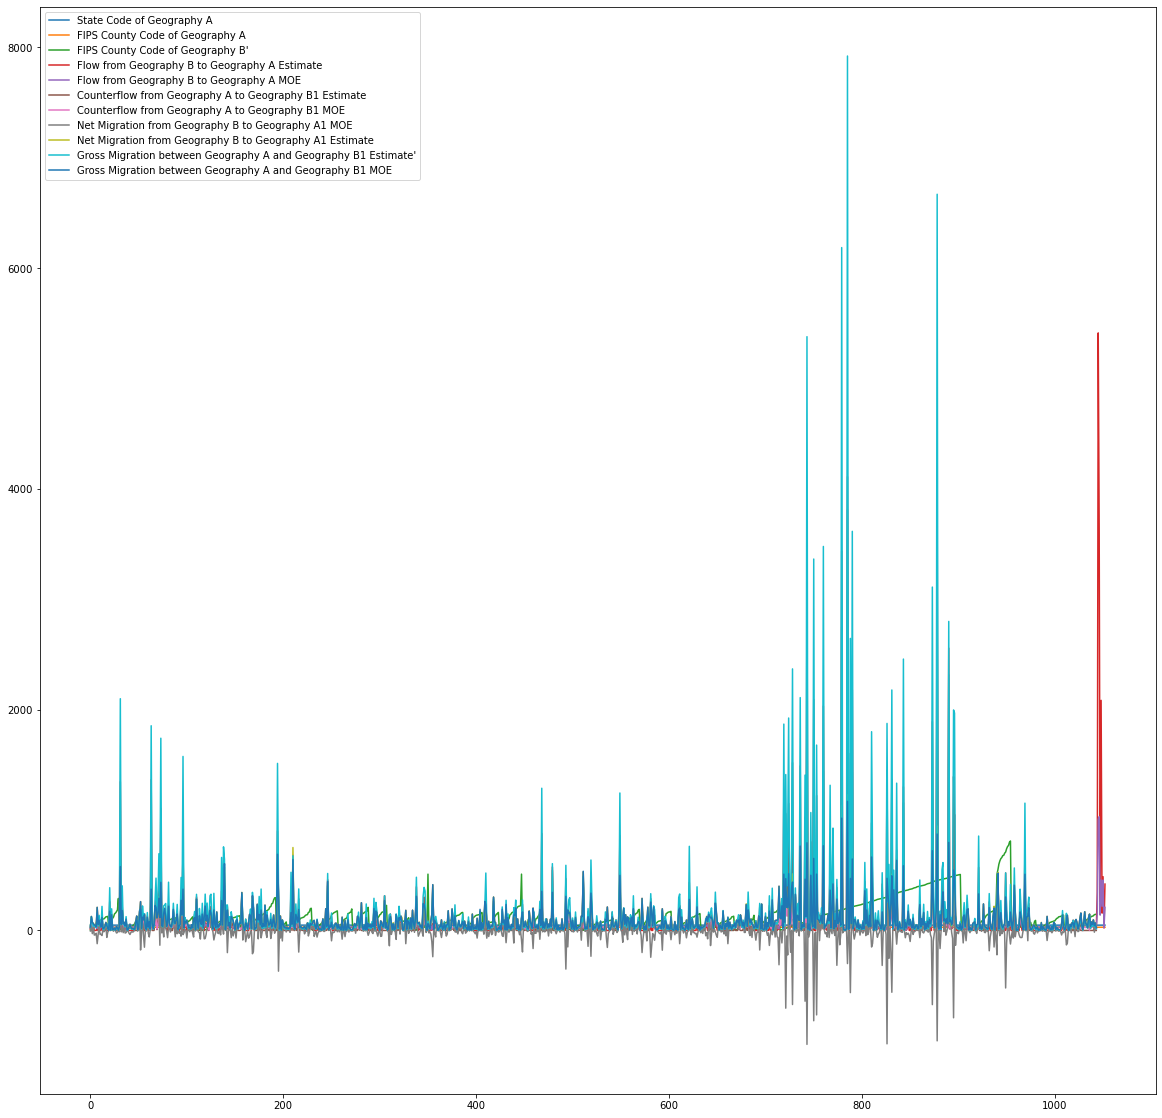

In [133]:
bexar_county_out.plot(figsize=(20,20))